In [15]:
# import packages
import numpy as np
import pylab as py
import pdb
import matplotlib.pyplot as plt
import math

# import spisea packages
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
from spisea.imf import imf, multiplicity

# import nbody6tools reader to read data
from nbody6tools import Reader

# import nbody62spisea to retrieve star ages
from nbody62spisea import converter

from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [16]:
# define isochrone parameters
AKs = 0
dist = 410
evo_model = evolution.Baraffe15()
atm_func = atmospheres.get_merged_atmosphere
red_law = reddening.RedLawHosek18b()
filt_list = ['jwst,F115W', 'jwst,F200W']
filters = ['m_jwst_F115W', 'm_jwst_F200W']
iso_dir = 'isochrones/'
metallicity = 0

In [17]:
level_ages = [1, 1.5]

for i in range(len(level_ages)):
    level_ages[i] = level_ages[i] * 1e6

# convert log ages from log(Myr) to log(yr)
log_ages = np.log10(level_ages)

# print(log_ages)
print("Min log age = " + str(min(log_ages)))
print("Max log age = " + str(max(log_ages)))

# print(level_ages)
print("Min level age = " + str(min(level_ages)))
print("Max level age = " + str(max(level_ages)))

Min log age = 6.0
Max log age = 6.176091259055681
Min level age = 1000000.0
Max level age = 1500000.0


In [18]:
# create isochrone grid - if this is the first time, then this is going to take an hour lmfao
instances = np.empty(len(log_ages), dtype=object)

for i in range(len(log_ages)):
    my_iso = synthetic.IsochronePhot(log_ages[i], AKs, dist, metallicity=metallicity,
                            evo_model=evo_model, atm_func=atm_func,
                            red_law=red_law, filters=filt_list,
                                iso_dir=iso_dir)
    instances[i] = my_iso
        
print("isochrone generation done")

isochrone generation done


In [46]:
import sys
sys.path.append('/scratch/wyz5rge/synthetic-hr/')
import interpolator as interpolator

mass = 0.9
age = 1.25

stars = np.empty(1, dtype=object)
for i in range(1):
    stars[i] = interpolator.interpolate(age, mass, instances, log_ages, filters)
    
star = stars[0]

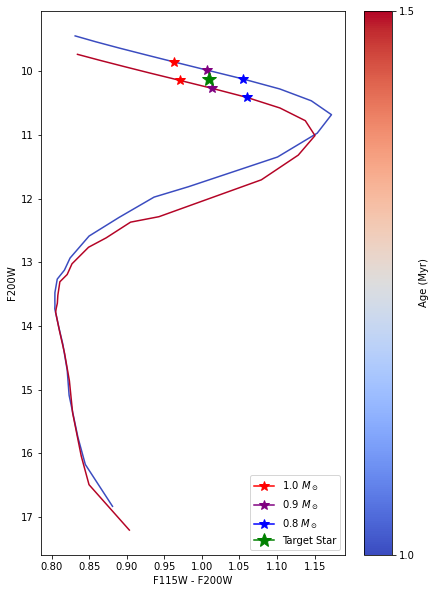

In [48]:
# identify array indeces, create array for labels and colors
idx_arr = range(0, len(log_ages))
if len(idx_arr) > 3:
    idx_arr = idx_arr[::2]

# Plot CMD
fig, axes = py.subplots(figsize=(15, 10))
py.subplot(1, 2, 1)

# define a colormap
cmap = plt.get_cmap('coolwarm')

for i in range(len(log_ages)):
    color = cmap(i / (len(log_ages) - 1))  # Assign color based on index and colormap
    py.plot(instances[i].points[filters[0]] - instances[i].points[filters[1]], 
           instances[i].points[filters[1]], color=color)

idx_1p0 = np.where( abs(instances[0].points['mass'] - 1.0) == min(abs(instances[0].points['mass'] - 1.0)) )[0]
py.plot(instances[0].points[filters[0]][idx_1p0] - instances[0].points[filters[1]][idx_1p0],
       instances[0].points[filters[1]][idx_1p0], ms=10, marker='*', color='r', label='1.0 $M_\odot$')
idx_0p9 = np.where( abs(instances[0].points['mass'] - 0.9) == min(abs(instances[0].points['mass'] - 0.9)) )[0]
py.plot(instances[0].points[filters[0]][idx_0p9] - instances[0].points[filters[1]][idx_0p9],
       instances[0].points[filters[1]][idx_0p9], ms=10, marker='*', color='purple', label='0.9 $M_\odot$')
idx_0p8 = np.where( abs(instances[0].points['mass'] - 0.8) == min(abs(instances[0].points['mass'] - 0.8)) )[0]
py.plot(instances[0].points[filters[0]][idx_0p8] - instances[0].points[filters[1]][idx_0p8],
       instances[0].points[filters[1]][idx_0p8], ms=10, marker='*', color='b', label='0.8 $M_\odot$')

idx_1p0 = np.where( abs(instances[1].points['mass'] - 1.0) == min(abs(instances[1].points['mass'] - 1.0)) )[0]
py.plot(instances[1].points[filters[0]][idx_1p0] - instances[1].points[filters[1]][idx_1p0],
       instances[1].points[filters[1]][idx_1p0], ms=10, marker='*', color='r')
idx_0p9 = np.where( abs(instances[1].points['mass'] - 0.9) == min(abs(instances[1].points['mass'] - 0.9)) )[0]
py.plot(instances[1].points[filters[0]][idx_0p9] - instances[1].points[filters[1]][idx_0p9],
       instances[1].points[filters[1]][idx_0p9], ms=10, marker='*', color='purple')
idx_0p8 = np.where( abs(instances[1].points['mass'] - 0.8) == min(abs(instances[1].points['mass'] - 0.8)) )[0]
py.plot(instances[1].points[filters[0]][idx_0p8] - instances[1].points[filters[1]][idx_0p8],
       instances[1].points[filters[1]][idx_0p8], ms=10, marker='*', color='b')

py.plot(star[3] - star[4], star[4], marker='*', ms=15, color='green', label='Target Star')
        
py.xlabel('F115W - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()
py.legend()

norm = Normalize(vmin=min(level_ages), vmax=max(level_ages))
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Age (Myr)')
cbar.set_ticks(level_ages)
cbar.set_ticklabels([f'{age/1e6:.1f}' for age in level_ages])